<a href="https://colab.research.google.com/github/KevinTheRainmaker/ML_DL_Basics/blob/master/Udacity%3A%20Intro%20to%20TensorFlow%20for%20DL/TFSD_S1L1_Colab1_Celsius_To_Fahrenheit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Basics: Traning First Model
The problem we will solve is to convert from Celsius to Fahrenheit, where the approximate formula is:

$f = c * 1.8 + 32$

We will give TensorFlow some sample Celsius values (0, 8, 15, 22, 38) and their corresponding Fahrenheit values (32, 46, 59, 72, 100).

Then we will train a model that figures out the above formula through the trainig process.

## Import dependencies

In [27]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) # Tell TF only to log Error Message (*'logging' is removed from TF v2)
import numpy as np

## Set up trainig data

In [28]:
celsius_q = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

In [29]:
for i,c in enumerate(celsius_q):
  print(f'{c} degree Celsius = {fahrenheit_a[i]} degree Fahrenheit')

-40.0 degree Celsius = -40.0 degree Fahrenheit
-10.0 degree Celsius = 14.0 degree Fahrenheit
0.0 degree Celsius = 32.0 degree Fahrenheit
8.0 degree Celsius = 46.0 degree Fahrenheit
15.0 degree Celsius = 59.0 degree Fahrenheit
22.0 degree Celsius = 72.0 degree Fahrenheit
38.0 degree Celsius = 100.0 degree Fahrenheit


### Some ML Terminology
- **Feature:** The input(s) to our modle. In this case, a single value - the degree in Celsius.
- **Lables:** The output(s) that our model predicts. in this case, a single value - the degree of Fahrenheit.
- **Example:** A pair of inputs/outputs used during training. In this case a pair of values from celsius_q and fahrenheit_a at a specific index, such as (22, 72)

## Create the model

### Build a layer
We'll call the layer l_0 and create it by instantiating tf.keras.layers.Dense with the following configuraton:

- **input_shape = [1]**: This specifies that the input to this layer is a single value. That is, the shape is a one-dimensional array with one member. Since this is the first (and only) layer, that input shape is the input shape of the entire model. The songle value is a floating point number, representing degree Celsius.

- **units = 1**: This specifies the number of neurons in the layer. The number of neurons defines how many internal variables the layer has to try to learn how to solve the problem. Since this is the final layer, it is also the size of the model's output - a single float value representing degrees Fahrenheit. (In a multi-layered network, the size and shape of the layer would need to match the input_shape of the next layer.)

In [30]:
l_0 = tf.keras.layers.Dense(units= 1, input_shape = [1])

### Assemble layers into the model
Once layers are defined, they nedd to be assembled into a model. The sequential model definition takes a list of layers as a argument, specifying the calculation order from the input to the output.

This model has just a single layer, l_0.

In [31]:
model = tf.keras.Sequential([l_0])

**Note**

You will often see the layers defined inside the model definition, rather than beforehand:
~~~
model = tf.keras.Sequential([
  tf.keras.layers.Dense(units = 1, input_shape=[1])
  ])
~~~

## Compile the model, with loss and optimizer functions
Before training, the model has to be compiled. When compiled for training, the model is given:

- **Loss function**: A way of measuring how far off predictions are from the desired outcome. (The measured difference is called 'loss')

- **Optimizer function**: A way of adjutiong internal values in order to reduce the loss.

In [32]:
model.compile(loss='mean_squared_error',
              optimizer= tf.keras.optimizers.Adam(0.1)) # lr = 0.1

These are used during trainig (***model.fit()*** below) to first calculate the loss at each point, and then improve it. In fact, the act of calculating the current loss of a model and then improving it is precisely what training is.

During training, the optimizer function is used to calculate adjustments to the model's internal variables. The goal is to adjust the internal variables until the model mirrors the actual equation for converting Celsius to Fahrenheit.

TensorFlow uses numerical analysis to perform this tuning, and all this complexity is hidden from you.


<br/>

**Learning rate**


One part of the Optimizer you may need to think about when buillding your own models is the learning rate. This is the step size taken when adjustiong values in the model. If the values is too small, it will take too many iterations to train the model. If too large, the accuracy goes down.

Finding a good values often involves some trial and error, but the range is usually whithin 0.001(default) and 0.1.

## Train the model
Train the model by calling the ***fit method***.

During Training, the model takes in Celsius values, performs a calculation the current internal variables (called 'weights') and outputs values which are meant to be the Fahrenheit equivalent. Since the weights are initially set randomly, the output will not be close to the correct value. The difference between the actual output and the desired output is calculated using the loss function, and the optimizer function directs how the weights should be adjusted.

This cycle of calculate, comparem adjust is controlled by the fit method. The first argument is the inputs, the second argument is the desired outputs. The epochs arguments specifices how many times this cycle should be run, and the verbose argument controls how much output the method produces.

In [33]:
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False) # verbose : logging or not
print('Model Training Finished')

Model Training Finished


## Display trainig statistics

The fit method returns a history object. We can use this object to plot how the loss of our models goes down after each training epoch. A high loss means that the Fahrenheit degress the model predicts is far from the corresponding value in fahrenheit_a.

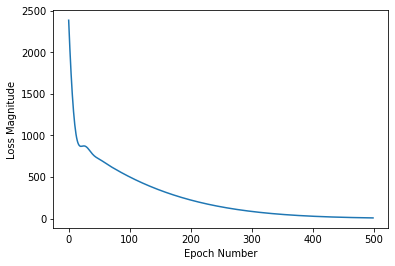

In [34]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel('Loss Magnitude')
plt.plot(history.history['loss'])

## Use the model to predict values

In [35]:
print(model.predict([100.0]))

[[211.32861]]


The correct answer is $100 * 1.8 + 32 = 212$, so our model is doing pretty well.

### To review
- We created a model with a Dense layer
- We trained it with 3500 examples (7 pairs, 500 epochs)

Our model tuned the variables (weights) in the Dense layer until it was able to return the correct Fahrenheit value for nay Celsius value.

## Looking at the layer weights

Finally, let's print the internal variables of the Dense layer.

In [37]:
print(f"These are the layer variables: {l_0.get_weights()}")

These are the layer variables: [array([[1.8219037]], dtype=float32), array([29.138248], dtype=float32)]


The first variable is close to 1.8 and the second to 32. These values are the actual variables in the real conversion formula.

For a single neuron with a single inout and single output, the internal math looks the same as **the equation for a line**, $y = mx + b$, which has the smae form as the conversion equation, $f = 1.8c + 32$.

With additional neurons, additional inputs, and additional outputs, the formula becomes much more complex, but the idea is the same.

----

### A little experiment

Just for funm what if we created more Dense layers with different units, which therfore also has more variables?

In [40]:
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1) # last layer

model = tf.keras.Sequential([l0,l1,l2])
model.compile(loss='mean_squared_error',
              optimizer = tf.keras.optimizers.Adam(0.1))

model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
print('Model Training Finished')

print(model.predict([100.0, 111.0]))

print(f'l0 varialbles: {l0.get_weights()}')
print(f'l1 varialbles: {l1.get_weights()}')
print(f'l2 varialbles: {l2.get_weights()}')

Model Training Finished
[[211.74744]
 [231.52489]]
l0 varialbles: [array([[-0.38457608,  0.35160187, -0.63798505, -0.1417045 ]],
      dtype=float32), array([-3.1157634, -1.5483127, -3.4781394, -3.2546334], dtype=float32)]
l1 varialbles: [array([[-0.6804285 ,  0.511673  ,  0.5276717 ,  0.9117809 ],
       [-0.00471738,  0.39349663,  0.58799523,  0.768391  ],
       [-0.7538634 ,  0.7930291 ,  0.22000024,  0.9816561 ],
       [-0.62792146,  0.62082005,  0.6643847 ,  0.42323163]],
      dtype=float32), array([ 2.676251 , -2.7146053, -3.265664 , -3.542716 ], dtype=float32)]
l2 varialbles: [array([[ 0.7204907 ],
       [-0.6759669 ],
       [-0.6308683 ],
       [-0.80012095]], dtype=float32), array([3.1629539], dtype=float32)]


As you can see, this model is also able to predict the corresponding Fahrenheit value really well. But when you look at the variables (weights) in the l0 and l1 layers, they are nothing even close to 1.8 and 32. the added complexity hides the 'simple' form if the conversion equation.